In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
#Create two arrays of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#zipping them
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list from the zipped tuple in API_practice notebook
coordinates = list(lat_lngs)

In [4]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
   city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

   # If the city is unique, then we will add it to the cities list.
   if city not in cities:
       cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

606

In [5]:
# build the basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities 
# and retrieve both the index, and the city from the list.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #   we are removing the blank spaces in 
    #   the city name and concatenating the city name with '+'
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list with a dictionary for that city.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as ex:
        print(ex)
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | ahipara
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | the pas
Processing Record 5 of Set 1 | grindavik
Processing Record 6 of Set 1 | jalu
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | male
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | illoqqortoormiut
'coord'
City not found. Skipping...
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | maniitsoq
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | cam ranh
Processing Record 20 of Set 1 | oakdale
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | mahon
Processing Record 24 of Set 1 | no

Processing Record 36 of Set 4 | ancud
Processing Record 37 of Set 4 | omboue
Processing Record 38 of Set 4 | tsihombe
'coord'
City not found. Skipping...
Processing Record 39 of Set 4 | hami
Processing Record 40 of Set 4 | grants
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | mys shmidta
'coord'
City not found. Skipping...
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | siwana
Processing Record 45 of Set 4 | nevinnomyssk
Processing Record 46 of Set 4 | baracoa
Processing Record 47 of Set 4 | kalach-na-donu
Processing Record 48 of Set 4 | tarudant
'coord'
City not found. Skipping...
Processing Record 49 of Set 4 | airai
Processing Record 50 of Set 4 | vanimo
Processing Record 1 of Set 5 | coihaique
Processing Record 2 of Set 5 | lendava
Processing Record 3 of Set 5 | lujan
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | krasnoselkup
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Se

Processing Record 21 of Set 8 | saryshagan
'coord'
City not found. Skipping...
Processing Record 22 of Set 8 | sao felix do xingu
Processing Record 23 of Set 8 | birobidzhan
Processing Record 24 of Set 8 | provideniya
Processing Record 25 of Set 8 | faya
Processing Record 26 of Set 8 | dingle
Processing Record 27 of Set 8 | boyolangu
Processing Record 28 of Set 8 | natal
Processing Record 29 of Set 8 | ust-kamchatsk
'coord'
City not found. Skipping...
Processing Record 30 of Set 8 | baykit
Processing Record 31 of Set 8 | mikhaylovka
Processing Record 32 of Set 8 | huarmey
Processing Record 33 of Set 8 | metu
Processing Record 34 of Set 8 | farah
Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | pedregulho
Processing Record 37 of Set 8 | yar-sale
Processing Record 38 of Set 8 | nehe
Processing Record 39 of Set 8 | plattsburgh
Processing Record 40 of Set 8 | hals
Processing Record 41 of Set 8 | misratah
Processing Record 42 of Set 8 | kyela
Processing Record 43 of Se

Processing Record 9 of Set 12 | havoysund
Processing Record 10 of Set 12 | loandjili
Processing Record 11 of Set 12 | imbituba
Processing Record 12 of Set 12 | kahului
Processing Record 13 of Set 12 | tazovskiy
Processing Record 14 of Set 12 | ambilobe
Processing Record 15 of Set 12 | kataysk
Processing Record 16 of Set 12 | fenelon falls
Processing Record 17 of Set 12 | inuvik
Processing Record 18 of Set 12 | lompoc
Processing Record 19 of Set 12 | challapata
Processing Record 20 of Set 12 | hunchun
Processing Record 21 of Set 12 | maarianhamina
Processing Record 22 of Set 12 | shelburne
Processing Record 23 of Set 12 | bolobo
Processing Record 24 of Set 12 | ereymentau
Processing Record 25 of Set 12 | amalapuram
Processing Record 26 of Set 12 | airdrie
Processing Record 27 of Set 12 | karasjok
Processing Record 28 of Set 12 | khuzhir
Processing Record 29 of Set 12 | amboasary
Processing Record 30 of Set 12 | margate
Processing Record 31 of Set 12 | fonte boa
Processing Record 32 of S

In [8]:
len(city_data)

558

In [9]:
# convert the list of dictionaries to a DataFrame
# confirm they are in the correct order
# export the DataFrame as a csv file
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0        Fortuna  40.60 -124.16     50.00        75          75       12.75   
1        Ahipara -35.17  173.17     57.11        82           1       12.10   
2        Rikitea -23.12 -134.97     72.41        77          83       16.58   
3        The Pas  53.83 -101.25     19.40        79          90       13.87   
4      Grindavik  63.84  -22.43     41.00        86          75       23.04   
5           Jalu  29.03   21.55     71.10        50          99        8.61   
6     Bredasdorp -34.53   20.04     55.40        87           3       10.29   
7          Kapaa  22.08 -159.32     78.80        78          20       16.11   
8           Male   4.17   73.51     78.80        94          75       10.29   
9  Mount Gambier -37.83  140.77     48.20        93          84        5.82   

  Country                 Date  
0      US  2020-11-08 18:48:03  
1      NZ  2020-11-08 18:52:45  
2      PF  2020-11-08 18:52:45  
3      CA  2020-11-08 18:52:46  
4      IS  2020-11-08 18:52:46  
5      LY  2020-11-08 18:52:46  
6      ZA  2020-11-08 18:52:46  
7      US  2020-11-08 18:49:11  
8      MV  2020-11-08 18:52:46  
9      AU  2020-11-08 18:52:46

In [10]:
# to order the Dataframe correctly
# first create a variable to hold an array with the columns in the correct order
# then we assign the DataFrame (or a new one) with the array
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

City Country                 Date    Lat     Lng  Max Temp  \
0        Fortuna      US  2020-11-08 18:48:03  40.60 -124.16     50.00   
1        Ahipara      NZ  2020-11-08 18:52:45 -35.17  173.17     57.11   
2        Rikitea      PF  2020-11-08 18:52:45 -23.12 -134.97     72.41   
3        The Pas      CA  2020-11-08 18:52:46  53.83 -101.25     19.40   
4      Grindavik      IS  2020-11-08 18:52:46  63.84  -22.43     41.00   
5           Jalu      LY  2020-11-08 18:52:46  29.03   21.55     71.10   
6     Bredasdorp      ZA  2020-11-08 18:52:46 -34.53   20.04     55.40   
7          Kapaa      US  2020-11-08 18:49:11  22.08 -159.32     78.80   
8           Male      MV  2020-11-08 18:52:46   4.17   73.51     78.80   
9  Mount Gambier      AU  2020-11-08 18:52:46 -37.83  140.77     48.20   

   Humidity  Cloudiness  Wind Speed  
0        75          75       12.75  
1        82           1       12.10  
2        77          83       16.58  
3        79          90       13.87  
4        86          75       23.04  
5        50          99        8.61  
6        87           3       10.29  
7        78          20       16.11  
8        94          75       10.29  
9        93          84        5.82

In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
# If we ever need to export the CSV file to a DataFrame, column A "City_ID" will be present in the DataFrame

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/08/20'

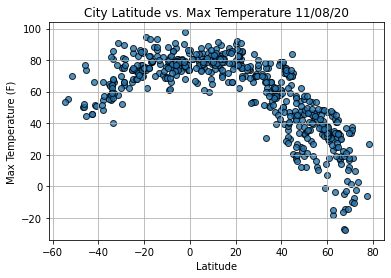

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

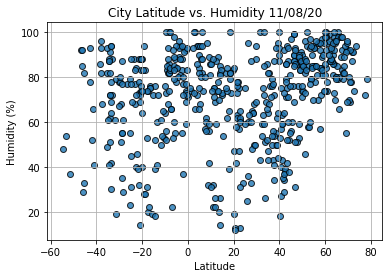

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

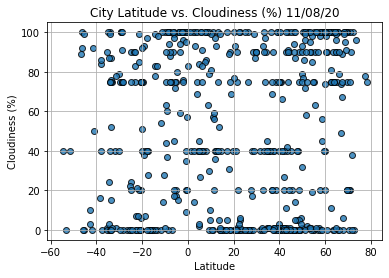

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

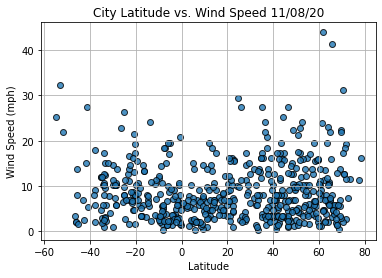

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f" r value is: {r_value:.2f}")

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

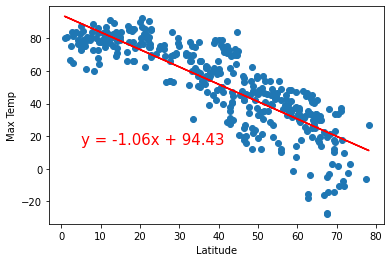

 r value is: -0.84


In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,15))

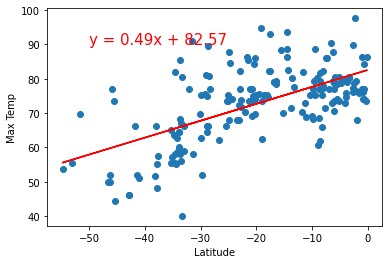

 r value is: 0.61


In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

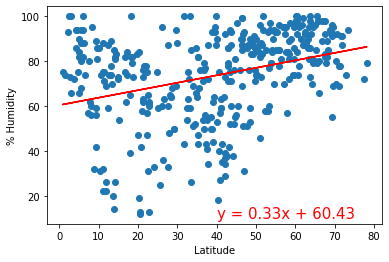

 r value is: 0.33


In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

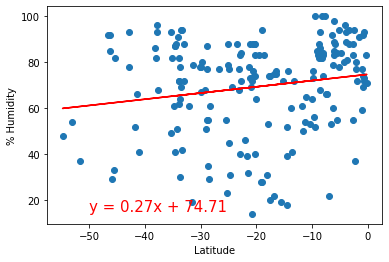

 r value is: 0.17


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

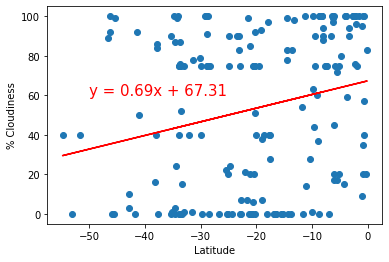

 r value is: 0.24


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

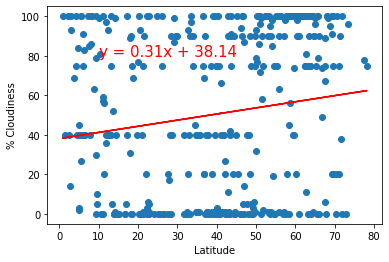

 r value is: 0.15


In [31]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,80))

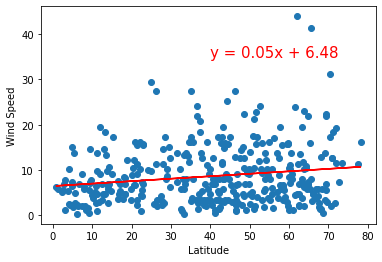

 r value is: 0.17


In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

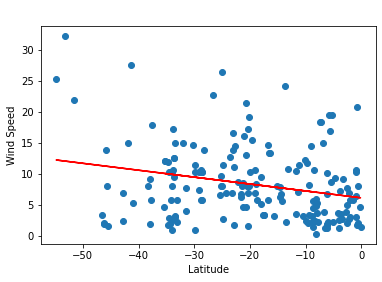

 r value is: -0.25


In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))